# Защита персональных данных клиентов

## Введение

Вам нужно защитить данные клиентов страховой компании «Хоть потоп». Разработайте такой метод преобразования данных, чтобы по ним было сложно восстановить персональную информацию. Обоснуйте корректность его работы.

План работы:

- EDA
- Ответы на вопросы
- Алгоритм
- Проверка алгоритма



## EDA

In [18]:
# импорт функций

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# модели
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

# метрики
from sklearn.metrics import r2_score

# отключаем предупреждения
import warnings
warnings.filterwarnings('ignore')

In [2]:
# импорт датасета
try:
    data = pd.read_csv('insurance.csv') 
except:
    data = pd.read_csv('https://code.s3.yandex.net/datasets/insurance.csv')


In [3]:
data.head()

,Пол,Возраст,Зарплата,Члены семьи,Страховые выплаты
0,1,41.0,49600.0,1,0
1,0,46.0,38000.0,1,1
2,0,29.0,21000.0,0,0
3,0,21.0,41700.0,2,0
4,1,28.0,26100.0,0,0


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Пол                5000 non-null   int64  
 1   Возраст            5000 non-null   float64
 2   Зарплата           5000 non-null   float64
 3   Члены семьи        5000 non-null   int64  
 4   Страховые выплаты  5000 non-null   int64  
dtypes: float64(2), int64(3)
memory usage: 195.4 KB


In [5]:
data.columns = data.columns.str.lower()
data.rename(columns={'члены семьи': 'члены_семьи', 'страховые выплаты': 'страховые_выплаты'}, inplace=True)

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   пол                5000 non-null   int64  
 1   возраст            5000 non-null   float64
 2   зарплата           5000 non-null   float64
 3   члены_семьи        5000 non-null   int64  
 4   страховые_выплаты  5000 non-null   int64  
dtypes: float64(2), int64(3)
memory usage: 195.4 KB


In [7]:
data.duplicated().value_counts(normalize=True)

False    0.9694
True     0.0306
dtype: float64

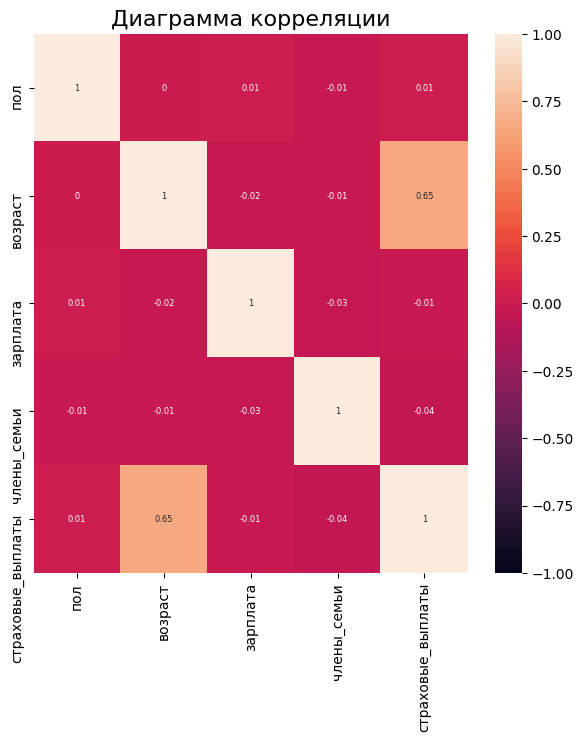

In [8]:
fig, ax = plt.subplots(figsize=(7, 7))

sns.heatmap(data.corr().round(2), 
            vmin=-1, 
            vmax=1, 
            annot=True, 
            annot_kws={'fontsize': 6,})
plt.title('Диаграмма корреляции', fontsize=16)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.show()

Вывод:

Данные без пропусков, присутствует незначительное количество дубликатов, средняя корреляция целевого признака с параметром возраст. Назвения столбцов приведены к нижнему регистру.

## Ответ на вопрос

Признаки умножают на обратимую матрицу. Изменится ли качество линейной регрессии? (Её можно обучить заново.)
a. Изменится. Приведите примеры матриц.
b. Не изменится. Укажите, как связаны параметры линейной регрессии в исходной задаче и в преобразованной.

Вырожденные случаи рассматривать не будем. 

Проведем исследование общего случая. 

Обозначения:

- $X$ — матрица признаков (нулевой столбец состоит из единиц)

- $y$ — вектор целевого признака

- $P$ — матрица, на которую умножаются признаки

- $w$ — вектор весов линейной регрессии (нулевой элемент равен сдвигу)

Предсказания:

$$
a = Xw
$$

Задача обучения:

$$
w = \arg\min_w MSE(Xw, y)
$$

Формула обучения:

$$
w = (X^T X)^{-1} X^T y
$$

Домножим матрицу признаков на обратимую матрицу P и посмотрим на вектор весов w'

$$
w' = ((X P)^T X P)^{-1} (X P)^T y = 
$$

Проведем преобразования

$$
w' =  P^{-1}(X^T X)^{-1}(P^T)^{-1} P^T X^T y
$$

Сократим $$ (P^T)^{-1} P^T $$


$$
w' =  P^{-1}(X^T X)^{-1} X^T y
$$

Подставим в модель предсказания $$X P$$ и $$w'$$

$$
a' = X P P^{-1} (X^T X)^{-1} X^T = X w
$$

Мы соктратили и преобразовали $$P P^{-1}$$. $$ (X^T X)^{-1} X^T -> w$$

Мы получили исходную формулу. 

Вывод: при домножении матрицы признаков на обратимую матрицу предсказание линейной реггрессии не меняется.











## Алгоритм

Предложите алгоритм преобразования данных для решения задачи. Обоснуйте, почему качество линейной регрессии не поменяется.

Как было показано при домножении на обратимую матрицу предсказание модели линейной регрессии не меняется. На основании этого предложим следующий алгоритм шифрования персональных данных:

1. Создаем случайную матрицу и проверяем ее на обратимость
2. Умножаем матрицу признаков на нашу случайную матрицу. Таргеты не трогаем.
3. При необходимости восстановить признаки умножам их на матрицу обратную сгенерированной.


Качество линейной регрессии не поменяется по причине неизменности преддсказаний модели. Это было покащано в предыдущем пункте.

## Проверка алгоритма.

Обучим модель на оригинальной матрице и на шифрованной матрицу. Сравним r2 метрику. 

In [20]:
# выделяем таргет
features = data.drop(['страховые_выплаты'], axis=1)
target = data['страховые_выплаты']
features.shape, target.shape

((5000, 4), (5000,))

In [21]:
#зададим случайную матрицу и проверем ее на обратимость
flag = True
P = None
while flag:
    P = np.random.uniform(0.1, 1, (features.shape[1], features.shape[1]))
    P_ = np.linalg.inv(P)
    if np.allclose(P @ P_, np.eye(features.shape[1])):
        flag = False
P, P_

(array([[0.53774169, 0.92428263, 0.32238709, 0.63520261],
        [0.44351066, 0.36947939, 0.79269498, 0.25748704],
        [0.92652647, 0.46252972, 0.54772691, 0.53962992],
        [0.83250055, 0.36560151, 0.57656738, 0.1005298 ]]),
 array([[-0.37529635, -1.30271506,  0.83910955,  1.20375091],
        [ 1.68652708, -0.23923937, -2.13440348,  1.41353735],
        [-0.47124356,  1.95247441, -0.3025957 , -0.39900632],
        [-0.32287705,  0.46000513,  2.54898326, -2.87338332]]))

### Проверка на оригинальном наборе данных

In [24]:
#делим на выборки
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size = 0.25, random_state=123)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((3750, 4), (1250, 4), (3750,), (1250,))

In [30]:
X_train.head()

,пол,возраст,зарплата,члены_семьи
2413,1,30.0,42600.0,2
1471,1,30.0,24900.0,1
1196,0,24.0,45600.0,0
1509,0,49.0,35300.0,1
4110,1,30.0,37400.0,0


In [26]:
#обучаем модель и проверяем качество
model = LinearRegression()
clf = model.fit(X_train, y_train)
score = r2_score(y_test, clf.predict(X_test))
score

0.43018469990933306

### Проверка на зашифрованном наборе

In [27]:
# шифруем признаки
features_safe = features @ P
features_safe.shape

(5000, 4)

In [32]:
features_safe.head()

,0,1,2,3
0,45975.267183,22957.912723,27200.654139,26776.936941
1,35229.239921,17593.491069,20850.663082,20517.882053
2,19469.917718,9723.839053,11525.253245,11339.695532
3,38647.132601,19295.979655,22858.011838,22508.176126
4,24195.296956,12083.295436,14318.190174,14092.185861


In [35]:
# проверим, что данные можно восстановить
(features_safe @ P_).round().head()

,0,1,2,3
0,1.0,41.0,49600.0,1.0
1,0.0,46.0,38000.0,1.0
2,-0.0,29.0,21000.0,0.0
3,0.0,21.0,41700.0,2.0
4,1.0,28.0,26100.0,0.0


In [28]:
X_train_, X_test_, y_train_, y_test_ = train_test_split(features_safe, target, test_size = 0.25, random_state=123)

In [31]:
X_train_.head()

,0,1,2,3
2413,39485.535764,19716.506001,23358.422698,22996.795644
1471,23085.184711,11529.364330,13663.079840,13445.245456
1196,42260.251372,21100.222804,24995.371734,24613.304232
1509,32728.948979,16345.769259,19374.178512,19061.653719
4110,34665.933109,17310.620247,20509.089636,20190.518978


In [29]:
#обучаем модель и проверяем качество
model_ = LinearRegression()
clf_ = model.fit(X_train_, y_train_)
score_ = r2_score(y_test_, clf_.predict(X_test_))
score_

0.43018469990931707

## Вывод

Мы предложили алгоритм шифрования данных. Проверели его работоспособность и обратимость преобразований. По ходу работы алгоритм был теоретически обоснован. И результатаы были подтверждены практически.

Предложенный алгоритм: 

1. Создаем случайную матрицу и проверяем ее на обратимость
2. Умножаем матрицу признаков на нашу случайную матрицу. Таргеты не трогаем.
3. При необходимости восстановить признаки умножам их на матрицу обратную сгенерированной.

Теоретическое обоснование возможности работы с зашифрованными таким образом данными в п.3 

На практике было подверждено, что модели обученные на чистом наборе данных и зашифрованном наборе данных показывают одинаковое качество.
